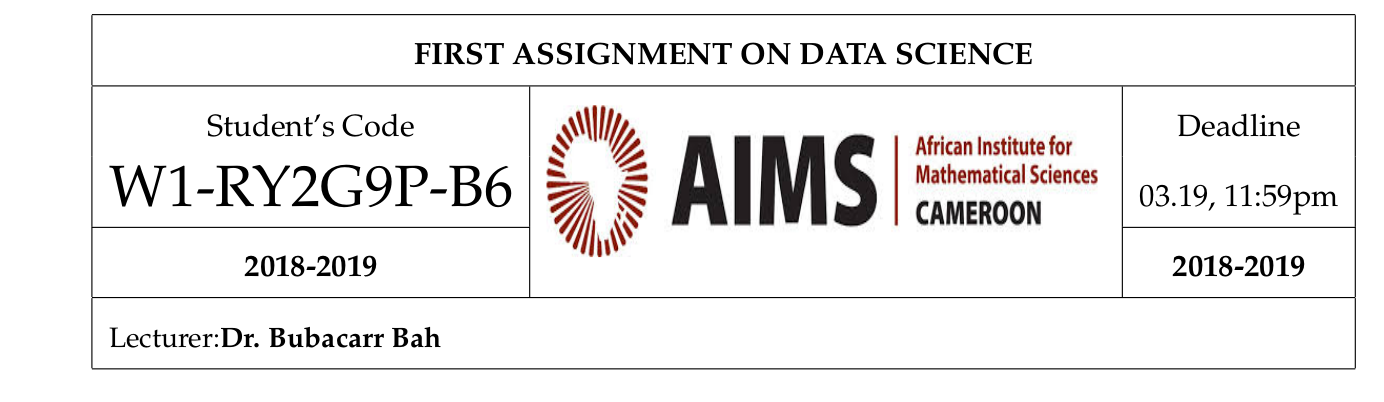

In [47]:
from IPython.display import Image
Image('ok.png')


# Problem 1: Optimization

Typically, for many linear inverse problems the optimisation problem you want to solve is the following unconstrained optimisation problem:
$$\underset{\theta}{min} J(\theta):=\frac{1}{2}||A\theta-y||_{2}^2$$

This optimization problem (2) is equivalent to the following Lagrangian formulation:

\begin{equation}
\underset{\theta}{min}J(\theta)+\frac{\lambda}{2}||\theta||^2_2 \leq B  
\end{equation}
Show that the solution of the minimization problem 3 is given by:

\begin{equation}
\theta=(A^TA+\lambda I)^{-1}A^Ty  
\end{equation}
where  is the identity matrix.

ANSWER

\begin{equation}
\underset{\theta}{min}J(\theta):=\frac{1}{2}||A\theta-y||_{2}^2
\end{equation}
We replace this expression inside equation (3) we get:
\begin{align*}
L(\theta)=&\frac{1}{2}||A\theta-y||_{2}^2+\frac{\lambda}{2}||\theta||^2_2\\
=&\frac{1}{2}\left[(A\theta-y)^T(A\theta-y)\right]+\frac{1}{2}\lambda\theta \theta^T\\
=&\frac{1}{2}\left(A^T\theta^TA\theta-A^T\theta^Ty-y^TA\theta+y^Ty\right)+\frac{1}{2}\lambda\theta \theta^T\\
=&\frac{1}{2}\left(A^T\theta^TA\theta-2A^T\theta^Ty+y^Ty\right)+\frac{1}{2}\lambda\theta \theta^T\\
\end{align*}
Because, $$yA^T\theta^T=y^TA\theta$$
Hence, $$L(\theta)=\frac{1}{2}\left(A^T\theta^TA\theta-2A^T\theta^Ty+y^Ty\right)+\frac{1}{2}\lambda\theta \theta^T$$
\begin{align*}
\nabla_{\theta}L(\theta)=&\frac{1}{2}\left(2A^T\theta A-2A^Ty\right)+\frac{\lambda}{2}\times 2\theta\\
=&\frac{1}{2}\left[2\theta(A^TA+\lambda I)-2A^Ty\right]
\end{align*}
When we set $\nabla_{\theta}L(\theta)=0$ we have:
$$2\theta(A^TA+\lambda I)=2A^Ty$$
Hence,
$$\theta=(A^TA+\lambda I)^{-1}A^Ty$$
\end{document}


# Problem 2: Classification


Import the breast cancer dataset from scikit-learn and perform a classification on it
using the KNeighborsClassifier (k-NN) for k = 1, 2, . . . , 10. For each value of k record the
training and testing errors (using the in-built accuracy score of the k-NN). Then plot
both sets of errors on one plot with the right legend. Based on this result what would
you consider the optimal k for this problem?

In [1]:

import pandas as pd
import matplotlib
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))


cancer.keys(): 
dict_keys(['target_names', 'DESCR', 'feature_names', 'target', 'data'])


In [3]:
X = cancer.data  #feature matrix
y = cancer.target #response vector

In [4]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [5]:
print("Feature names:\n{}".format(cancer.feature_names))


Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [7]:
df = pd.DataFrame(X, columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploratory Analysis

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

In [9]:
df['y']=y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [11]:
df.sample(8)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
106,11.64,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,29.26,85.51,521.7,0.1688,0.2660,0.28730,0.12180,0.2806,0.09097,1
130,12.19,13.29,79.08,455.8,0.10660,0.09509,0.02855,0.02882,0.1880,0.06471,...,17.81,91.38,545.2,0.1427,0.2585,0.09915,0.08187,0.3469,0.09241,1
195,12.91,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,22.00,90.81,600.6,0.1097,0.1506,0.17640,0.08235,0.3024,0.06949,1
335,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,...,33.15,143.20,1362.0,0.1449,0.2053,0.39200,0.18270,0.2623,0.07599,0
239,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,0.1809,0.05966,...,44.87,141.20,1408.0,0.1365,0.3735,0.32410,0.20660,0.2853,0.08496,0
438,13.85,19.60,88.68,592.6,0.08684,0.06330,0.01342,0.02293,0.1555,0.05673,...,28.01,100.90,749.1,0.1118,0.1141,0.04753,0.05890,0.2513,0.06911,1
267,13.59,21.84,87.16,561.0,0.07956,0.08259,0.04072,0.02142,0.1635,0.05859,...,30.04,97.66,661.5,0.1005,0.1730,0.14530,0.06189,0.2446,0.07024,1
352,25.73,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,0.06121,...,23.58,229.30,3234.0,0.1530,0.5937,0.64510,0.27560,0.3690,0.08815,0


In [14]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Visualization

Populating the interactive namespace from numpy and matplotlib


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f622176a2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f621f6c79e8>]], dtype=object)

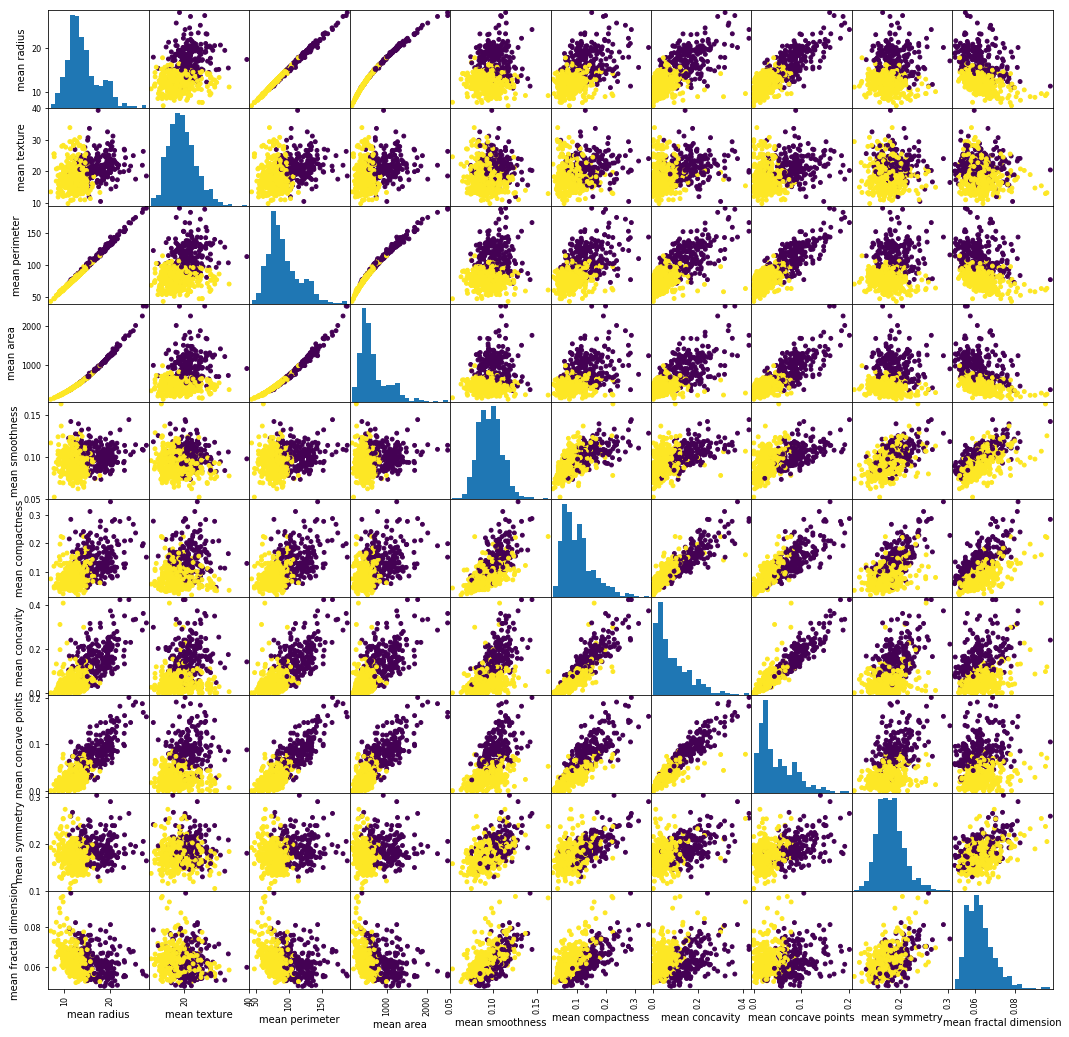

In [15]:
#visualisation
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pd.scatter_matrix(df[['mean radius', 'mean texture', 'mean perimeter',
'mean area','mean smoothness', 'mean compactness', 'mean concavity','mean concave points', 'mean symmetry',
'mean fractal dimension']] , hist_kwds={'bins':20} , c = df['y'] , s = 60 , alpha = 5  , figsize=(18,18))

## Model, Trainning and Testing

In [16]:
#importing the model
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#instantiating the model
knn= KNeighborsClassifier( n_neighbors=1)



In [18]:
#fitting the model with the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### creation of a training set and a testing set

In [20]:
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=1)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size =0.25)

In [114]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### we instantiate a k-NN class and fit with our training set.

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [32]:
y_pred  = knn.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1])

### we make a prediction based on the test set

In [23]:
print("prediction(Test set): {}".format(knn.predict(X_test)))
# We calculate the predictions for y_test with the clf model


prediction(Test set): [1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1]


### we evaluate the accuracy of the model by comparing the predictions with “correct answers”.

In [24]:
print("test accuracy: {:.2f}".format(knn.score(X_test, y_test)))



test accuracy: 0.93


In [25]:
print("training accuracy: {:.2f}".format(knn.score(X_train, y_train)))

training accuracy: 1.00


### The model has an test accuracy of 93% and 100% for training accuracy with n_neighbors=1.

In [36]:
import numpy as np
print("fraction of correct examples")
print(np.sum(y_pred == y_test) / float(len(y_test)))

fraction of correct examples
0.93006993007


In [37]:
from sklearn import metrics
metrics.accuracy_score(y_test , y_pred)

0.93006993006993011

In [38]:
#allow us to have the point that belong to predict and actual
metrics.confusion_matrix(y_test , y_pred)

array([[48,  6],
       [ 4, 85]])

Populating the interactive namespace from numpy and matplotlib


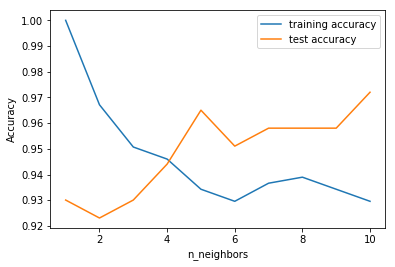

In [44]:
%pylab inline
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target,
    random_state=42, test_size =0.25)
# Create training and testing datasets

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10 (k=1,2..10)
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # import the model and instantiate
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_settings,
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


In [45]:
training_accuracy #trainng of neighbors from 1 to 10

[1.0,
 0.96713615023474175,
 0.95070422535211263,
 0.9460093896713615,
 0.93427230046948362,
 0.92957746478873238,
 0.93661971830985913,
 0.93896713615023475,
 0.93427230046948362,
 0.92957746478873238]

In [46]:
test_accuracy #test of neighbors from 1 to 10

[0.93006993006993011,
 0.92307692307692313,
 0.93006993006993011,
 0.94405594405594406,
 0.965034965034965,
 0.95104895104895104,
 0.95804195804195802,
 0.95804195804195802,
 0.95804195804195802,
 0.97202797202797198]

## Conclusion

the test set is best around k=5 the pic.The two curves intersect at k=4. Another thing to be noted is that since kNN models is the most complex when k=1, the trends of the two lines are flipped compared to standard complexity-accuracy chart for models.